In [129]:
## 데이터 증강X, 에포크 늘리기, 64픽셀

import os
import warnings
warnings.filterwarnings(action='ignore')
from glob import glob
import numpy as np
import PIL
from PIL import Image
import cv2

from segment import *

In [2]:
path = './64hair/'

training_images = []
training_labels = []

# Label & image
for img in glob(path + "/*.png"):
    image = cv2.imread(img, cv2.IMREAD_COLOR)
    an_img = Image.fromarray(image)
    img_array = np.array(an_img)
    training_images.append(img_array)
    label = img.split('\\')[-1]
    training_labels.append(label)
        
training_images = np.array(training_images)
training_labels = np.array(training_labels)

### 헤어 이미지 13개 라벨링(숫자)

from sklearn.preprocessing import LabelEncoder
# Label = 0 ~ 12
le = LabelEncoder()
training_labels = le.fit_transform(training_labels)
training_labels = training_labels.reshape(-1, 1)

print(training_images.shape)
print(training_labels.shape)

(13, 64, 64, 3)
(13, 1)


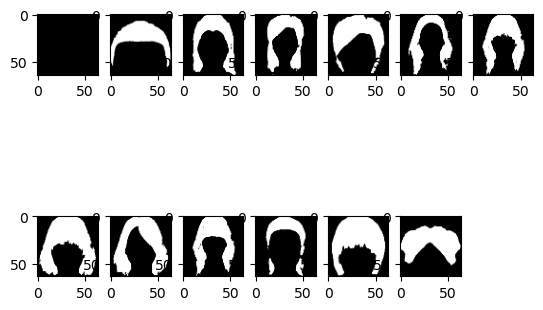

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 18개 헤어 이미지 출력
for i in range(13):
    plt.subplot(2, 7, i+1)
    plt.imshow(training_images[i])
plt.show()

In [4]:
## 라벨과 헤어 이름 맞추기
label_num = list(range(training_images.shape[0]))
label_name = le.inverse_transform(label_num)

for i in range(13):
    print(label_num[i], label_name[i])

0 hair0.png
1 hair1.png
2 hair10.png
3 hair11.png
4 hair12.png
5 hair2.png
6 hair3.png
7 hair4.png
8 hair5.png
9 hair6.png
10 hair7.png
11 hair8.png
12 hair9.png


In [5]:
training_labels = tf.one_hot(training_labels, training_images.shape[0])
training_labels = np.array(training_labels)
training_labels = training_labels.reshape(-1, training_images.shape[0])

In [6]:
X_train = training_images
y_train = training_labels

In [7]:
X_train.shape

(13, 64, 64, 3)

In [8]:
X_train = X_train / 255.0

In [22]:
# Modeling

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import *

model = Sequential()
# model.add(tf.keras.Input(shape=(128,128,3)))
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))

model.add(Dense(training_images.shape[0], activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

# model.fit(train_x, train_labels, epochs=500, verbose=0)

In [23]:
print(X_train.shape)
print(y_train.shape)

(13, 64, 64, 3)
(13, 13)


In [112]:
data = model.fit(X_train,
                y_train,
                epochs = 2000,
                batch_size=32,)

Epoch 1/2000
1/1 [==============================] - 0s 29ms/step - loss: 1.5314e-06 - accuracy: 1.0000
Epoch 2/2000
1/1 [==============================] - 0s 29ms/step - loss: 1.5314e-06 - accuracy: 1.0000
Epoch 3/2000
1/1 [==============================] - 0s 28ms/step - loss: 1.5314e-06 - accuracy: 1.0000
Epoch 4/2000
1/1 [==============================] - 0s 29ms/step - loss: 1.5222e-06 - accuracy: 1.0000
Epoch 5/2000
1/1 [==============================] - 0s 28ms/step - loss: 1.5222e-06 - accuracy: 1.0000
Epoch 6/2000
1/1 [==============================] - 0s 28ms/step - loss: 1.5222e-06 - accuracy: 1.0000
Epoch 7/2000
1/1 [==============================] - 0s 28ms/step - loss: 1.5130e-06 - accuracy: 1.0000
Epoch 8/2000
1/1 [==============================] - 0s 29ms/step - loss: 1.5130e-06 - accuracy: 1.0000
Epoch 9/2000
1/1 [==============================] - 0s 28ms/step - loss: 1.5039e-06 - accuracy: 1.0000
Epoch 10/2000
1/1 [==============================] - 0s 29ms/step - loss:

1/1 [==============================] - 0s 28ms/step - loss: 1.2838e-06 - accuracy: 1.0000
Epoch 158/2000
1/1 [==============================] - 0s 28ms/step - loss: 1.2838e-06 - accuracy: 1.0000
Epoch 159/2000
1/1 [==============================] - 0s 29ms/step - loss: 1.2838e-06 - accuracy: 1.0000
Epoch 160/2000
1/1 [==============================] - 0s 34ms/step - loss: 1.2838e-06 - accuracy: 1.0000
Epoch 161/2000
1/1 [==============================] - 0s 37ms/step - loss: 1.2838e-06 - accuracy: 1.0000
Epoch 162/2000
1/1 [==============================] - 0s 37ms/step - loss: 1.2838e-06 - accuracy: 1.0000
Epoch 163/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.2838e-06 - accuracy: 1.0000
Epoch 164/2000
1/1 [==============================] - 0s 37ms/step - loss: 1.2838e-06 - accuracy: 1.0000
Epoch 165/2000
1/1 [==============================] - 0s 37ms/step - loss: 1.2838e-06 - accuracy: 1.0000
Epoch 166/2000
1/1 [==============================] - 0s 36ms/step - l

1/1 [==============================] - 0s 28ms/step - loss: 1.0912e-06 - accuracy: 1.0000
Epoch 314/2000
1/1 [==============================] - 0s 27ms/step - loss: 1.0912e-06 - accuracy: 1.0000
Epoch 315/2000
1/1 [==============================] - 0s 26ms/step - loss: 1.0912e-06 - accuracy: 1.0000
Epoch 316/2000
1/1 [==============================] - 0s 26ms/step - loss: 1.0912e-06 - accuracy: 1.0000
Epoch 317/2000
1/1 [==============================] - 0s 28ms/step - loss: 1.0912e-06 - accuracy: 1.0000
Epoch 318/2000
1/1 [==============================] - 0s 28ms/step - loss: 1.0912e-06 - accuracy: 1.0000
Epoch 319/2000
1/1 [==============================] - 0s 27ms/step - loss: 1.0912e-06 - accuracy: 1.0000
Epoch 320/2000
1/1 [==============================] - 0s 27ms/step - loss: 1.0912e-06 - accuracy: 1.0000
Epoch 321/2000
1/1 [==============================] - 0s 28ms/step - loss: 1.0912e-06 - accuracy: 1.0000
Epoch 322/2000
1/1 [==============================] - 0s 28ms/step - l

1/1 [==============================] - 0s 27ms/step - loss: 9.5367e-07 - accuracy: 1.0000
Epoch 470/2000
1/1 [==============================] - 0s 28ms/step - loss: 9.5367e-07 - accuracy: 1.0000
Epoch 471/2000
1/1 [==============================] - 0s 27ms/step - loss: 9.5367e-07 - accuracy: 1.0000
Epoch 472/2000
1/1 [==============================] - 0s 28ms/step - loss: 9.5367e-07 - accuracy: 1.0000
Epoch 473/2000
1/1 [==============================] - 0s 27ms/step - loss: 9.5367e-07 - accuracy: 1.0000
Epoch 474/2000
1/1 [==============================] - 0s 29ms/step - loss: 9.5367e-07 - accuracy: 1.0000
Epoch 475/2000
1/1 [==============================] - 0s 27ms/step - loss: 9.5367e-07 - accuracy: 1.0000
Epoch 476/2000
1/1 [==============================] - 0s 28ms/step - loss: 9.5367e-07 - accuracy: 1.0000
Epoch 477/2000
1/1 [==============================] - 0s 28ms/step - loss: 9.4450e-07 - accuracy: 1.0000
Epoch 478/2000
1/1 [==============================] - 0s 28ms/step - l

1/1 [==============================] - 0s 28ms/step - loss: 8.4363e-07 - accuracy: 1.0000
Epoch 626/2000
1/1 [==============================] - 0s 27ms/step - loss: 8.4363e-07 - accuracy: 1.0000
Epoch 627/2000
1/1 [==============================] - 0s 28ms/step - loss: 8.4363e-07 - accuracy: 1.0000
Epoch 628/2000
1/1 [==============================] - 0s 28ms/step - loss: 8.4363e-07 - accuracy: 1.0000
Epoch 629/2000
1/1 [==============================] - 0s 28ms/step - loss: 8.4363e-07 - accuracy: 1.0000
Epoch 630/2000
1/1 [==============================] - 0s 29ms/step - loss: 8.3446e-07 - accuracy: 1.0000
Epoch 631/2000
1/1 [==============================] - 0s 28ms/step - loss: 8.3446e-07 - accuracy: 1.0000
Epoch 632/2000
1/1 [==============================] - 0s 29ms/step - loss: 8.3446e-07 - accuracy: 1.0000
Epoch 633/2000
1/1 [==============================] - 0s 28ms/step - loss: 8.2529e-07 - accuracy: 1.0000
Epoch 634/2000
1/1 [==============================] - 0s 28ms/step - l

1/1 [==============================] - 0s 29ms/step - loss: 7.4276e-07 - accuracy: 1.0000
Epoch 782/2000
1/1 [==============================] - 0s 27ms/step - loss: 7.4276e-07 - accuracy: 1.0000
Epoch 783/2000
1/1 [==============================] - 0s 34ms/step - loss: 7.3359e-07 - accuracy: 1.0000
Epoch 784/2000
1/1 [==============================] - 0s 35ms/step - loss: 7.3359e-07 - accuracy: 1.0000
Epoch 785/2000
1/1 [==============================] - 0s 34ms/step - loss: 7.3359e-07 - accuracy: 1.0000
Epoch 786/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.2442e-07 - accuracy: 1.0000
Epoch 787/2000
1/1 [==============================] - 0s 32ms/step - loss: 7.2442e-07 - accuracy: 1.0000
Epoch 788/2000
1/1 [==============================] - 0s 33ms/step - loss: 7.2442e-07 - accuracy: 1.0000
Epoch 789/2000
1/1 [==============================] - 0s 35ms/step - loss: 7.2442e-07 - accuracy: 1.0000
Epoch 790/2000
1/1 [==============================] - 0s 35ms/step - l

1/1 [==============================] - 0s 28ms/step - loss: 6.6940e-07 - accuracy: 1.0000
Epoch 938/2000
1/1 [==============================] - 0s 28ms/step - loss: 6.6940e-07 - accuracy: 1.0000
Epoch 939/2000
1/1 [==============================] - 0s 27ms/step - loss: 6.6940e-07 - accuracy: 1.0000
Epoch 940/2000
1/1 [==============================] - 0s 26ms/step - loss: 6.6940e-07 - accuracy: 1.0000
Epoch 941/2000
1/1 [==============================] - 0s 28ms/step - loss: 6.6940e-07 - accuracy: 1.0000
Epoch 942/2000
1/1 [==============================] - 0s 27ms/step - loss: 6.6940e-07 - accuracy: 1.0000
Epoch 943/2000
1/1 [==============================] - 0s 28ms/step - loss: 6.6940e-07 - accuracy: 1.0000
Epoch 944/2000
1/1 [==============================] - 0s 27ms/step - loss: 6.6940e-07 - accuracy: 1.0000
Epoch 945/2000
1/1 [==============================] - 0s 26ms/step - loss: 6.6940e-07 - accuracy: 1.0000
Epoch 946/2000
1/1 [==============================] - 0s 28ms/step - l

1/1 [==============================] - 0s 27ms/step - loss: 6.5107e-07 - accuracy: 1.0000
Epoch 1016/2000
1/1 [==============================] - 0s 28ms/step - loss: 6.5107e-07 - accuracy: 1.0000
Epoch 1017/2000
1/1 [==============================] - 0s 28ms/step - loss: 6.5107e-07 - accuracy: 1.0000
Epoch 1018/2000
1/1 [==============================] - 0s 27ms/step - loss: 6.5107e-07 - accuracy: 1.0000
Epoch 1019/2000
1/1 [==============================] - 0s 28ms/step - loss: 6.5107e-07 - accuracy: 1.0000
Epoch 1020/2000
1/1 [==============================] - 0s 27ms/step - loss: 6.5107e-07 - accuracy: 1.0000
Epoch 1021/2000
1/1 [==============================] - 0s 27ms/step - loss: 6.5107e-07 - accuracy: 1.0000
Epoch 1022/2000
1/1 [==============================] - 0s 28ms/step - loss: 6.5107e-07 - accuracy: 1.0000
Epoch 1023/2000
1/1 [==============================] - 0s 28ms/step - loss: 6.5107e-07 - accuracy: 1.0000
Epoch 1024/2000
1/1 [==============================] - 0s 28ms

1/1 [==============================] - 0s 80ms/step - loss: 5.9605e-07 - accuracy: 1.0000
Epoch 1170/2000
1/1 [==============================] - 0s 55ms/step - loss: 5.9605e-07 - accuracy: 1.0000
Epoch 1171/2000
1/1 [==============================] - 0s 71ms/step - loss: 5.9605e-07 - accuracy: 1.0000
Epoch 1172/2000
1/1 [==============================] - 0s 58ms/step - loss: 5.9605e-07 - accuracy: 1.0000
Epoch 1173/2000
1/1 [==============================] - 0s 67ms/step - loss: 5.9605e-07 - accuracy: 1.0000
Epoch 1174/2000
1/1 [==============================] - 0s 94ms/step - loss: 5.9605e-07 - accuracy: 1.0000
Epoch 1175/2000
1/1 [==============================] - 0s 52ms/step - loss: 5.9605e-07 - accuracy: 1.0000
Epoch 1176/2000
1/1 [==============================] - 0s 68ms/step - loss: 5.9605e-07 - accuracy: 1.0000
Epoch 1177/2000
1/1 [==============================] - 0s 79ms/step - loss: 5.9605e-07 - accuracy: 1.0000
Epoch 1178/2000
1/1 [==============================] - 0s 52ms

1/1 [==============================] - 0s 51ms/step - loss: 5.5020e-07 - accuracy: 1.0000
Epoch 1324/2000
1/1 [==============================] - 0s 93ms/step - loss: 5.5020e-07 - accuracy: 1.0000
Epoch 1325/2000
1/1 [==============================] - 0s 61ms/step - loss: 5.5020e-07 - accuracy: 1.0000
Epoch 1326/2000
1/1 [==============================] - 0s 54ms/step - loss: 5.5020e-07 - accuracy: 1.0000
Epoch 1327/2000
1/1 [==============================] - 0s 81ms/step - loss: 5.5020e-07 - accuracy: 1.0000
Epoch 1328/2000
1/1 [==============================] - 0s 91ms/step - loss: 5.5020e-07 - accuracy: 1.0000
Epoch 1329/2000
1/1 [==============================] - 0s 54ms/step - loss: 5.5020e-07 - accuracy: 1.0000
Epoch 1330/2000
1/1 [==============================] - 0s 83ms/step - loss: 5.5020e-07 - accuracy: 1.0000
Epoch 1331/2000
1/1 [==============================] - 0s 79ms/step - loss: 5.5020e-07 - accuracy: 1.0000
Epoch 1332/2000
1/1 [==============================] - 0s 70ms

1/1 [==============================] - 0s 77ms/step - loss: 5.0435e-07 - accuracy: 1.0000
Epoch 1478/2000
1/1 [==============================] - 0s 54ms/step - loss: 5.0435e-07 - accuracy: 1.0000
Epoch 1479/2000
1/1 [==============================] - 0s 65ms/step - loss: 5.0435e-07 - accuracy: 1.0000
Epoch 1480/2000
1/1 [==============================] - 0s 73ms/step - loss: 5.0435e-07 - accuracy: 1.0000
Epoch 1481/2000
1/1 [==============================] - 0s 54ms/step - loss: 5.0435e-07 - accuracy: 1.0000
Epoch 1482/2000
1/1 [==============================] - 0s 79ms/step - loss: 5.0435e-07 - accuracy: 1.0000
Epoch 1483/2000
1/1 [==============================] - 0s 71ms/step - loss: 5.0435e-07 - accuracy: 1.0000
Epoch 1484/2000
1/1 [==============================] - 0s 55ms/step - loss: 5.0435e-07 - accuracy: 1.0000
Epoch 1485/2000
1/1 [==============================] - 0s 80ms/step - loss: 5.0435e-07 - accuracy: 1.0000
Epoch 1486/2000
1/1 [==============================] - 0s 69ms

1/1 [==============================] - 0s 51ms/step - loss: 4.7684e-07 - accuracy: 1.0000
Epoch 1632/2000
1/1 [==============================] - 0s 79ms/step - loss: 4.7684e-07 - accuracy: 1.0000
Epoch 1633/2000
1/1 [==============================] - 0s 78ms/step - loss: 4.7684e-07 - accuracy: 1.0000
Epoch 1634/2000
1/1 [==============================] - 0s 65ms/step - loss: 4.6767e-07 - accuracy: 1.0000
Epoch 1635/2000
1/1 [==============================] - 0s 63ms/step - loss: 4.6767e-07 - accuracy: 1.0000
Epoch 1636/2000
1/1 [==============================] - 0s 90ms/step - loss: 4.5850e-07 - accuracy: 1.0000
Epoch 1637/2000
1/1 [==============================] - 0s 51ms/step - loss: 4.5850e-07 - accuracy: 1.0000
Epoch 1638/2000
1/1 [==============================] - 0s 89ms/step - loss: 4.5850e-07 - accuracy: 1.0000
Epoch 1639/2000
1/1 [==============================] - 0s 69ms/step - loss: 4.5850e-07 - accuracy: 1.0000
Epoch 1640/2000
1/1 [==============================] - 0s 66ms

1/1 [==============================] - 0s 75ms/step - loss: 4.4016e-07 - accuracy: 1.0000
Epoch 1786/2000
1/1 [==============================] - 0s 37ms/step - loss: 4.4016e-07 - accuracy: 1.0000
Epoch 1787/2000
1/1 [==============================] - 0s 52ms/step - loss: 4.4016e-07 - accuracy: 1.0000
Epoch 1788/2000
1/1 [==============================] - 0s 59ms/step - loss: 4.4016e-07 - accuracy: 1.0000
Epoch 1789/2000
1/1 [==============================] - 0s 60ms/step - loss: 4.4016e-07 - accuracy: 1.0000
Epoch 1790/2000
1/1 [==============================] - 0s 73ms/step - loss: 4.4016e-07 - accuracy: 1.0000
Epoch 1791/2000
1/1 [==============================] - 0s 44ms/step - loss: 4.4016e-07 - accuracy: 1.0000
Epoch 1792/2000
1/1 [==============================] - 0s 73ms/step - loss: 4.4016e-07 - accuracy: 1.0000
Epoch 1793/2000
1/1 [==============================] - 0s 69ms/step - loss: 4.4016e-07 - accuracy: 1.0000
Epoch 1794/2000
1/1 [==============================] - 0s 48ms

1/1 [==============================] - 0s 77ms/step - loss: 4.2182e-07 - accuracy: 1.0000
Epoch 1940/2000
1/1 [==============================] - 0s 64ms/step - loss: 4.2182e-07 - accuracy: 1.0000
Epoch 1941/2000
1/1 [==============================] - 0s 108ms/step - loss: 4.2182e-07 - accuracy: 1.0000
Epoch 1942/2000
1/1 [==============================] - 0s 63ms/step - loss: 4.2182e-07 - accuracy: 1.0000
Epoch 1943/2000
1/1 [==============================] - 0s 87ms/step - loss: 4.2182e-07 - accuracy: 1.0000
Epoch 1944/2000
1/1 [==============================] - 0s 45ms/step - loss: 4.2182e-07 - accuracy: 1.0000
Epoch 1945/2000
1/1 [==============================] - 0s 41ms/step - loss: 4.2182e-07 - accuracy: 1.0000
Epoch 1946/2000
1/1 [==============================] - 0s 48ms/step - loss: 4.2182e-07 - accuracy: 1.0000
Epoch 1947/2000
1/1 [==============================] - 0s 57ms/step - loss: 4.2182e-07 - accuracy: 1.0000
Epoch 1948/2000
1/1 [==============================] - 0s 61m

In [125]:
path = './testimg2/test3.jpg'
test = hair_seg(path)
test_array = testimg(64, test)

In [126]:
cv2.imshow('testimg', test_array)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [127]:
## Test
test_image = []
test_image.append(test_array)
test_image = np.array(test_image) / 255.0

In [128]:
pred = model.predict(test_image)

pred = np.argmax(pred)
print(label_name[pred])

1/1 [==============================] - 0s 87ms/step
hair4.png


In [66]:
model.save("female_hair.h5")